<a href="https://colab.research.google.com/github/Diehgon/Curso-coderhouse-DS/blob/main/1%C2%B0%20entrega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#water potability

In [ ]:
#importo librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl


In [ ]:
#cargo mi dataset
url='https://raw.githubusercontent.com/Diehgon/Curso-coderhouse-DS/main/water_potability.csv'
df = pd.read_csv(url, sep= ',')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
#informacion de los datos
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


(3276, 10)

In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
#analizando y remplazando valores nulos
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
print("Numero de todas las muestras : ", len(df))

Numero de todas las muestras :  3276


In [ ]:
print('Porcentaje(%) de nulos para cada columna : \n')
print((df.isna().sum()/len(df))*100)

Porcentaje(%) de nulos para cada columna : 

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64


In [ ]:
#reemplazo los valores faltantes con la mediana en las columnas: ph, Sulfate, Trihalomethanes.
print("para Potability=1")
df[df.Potability==1][['ph', 'Sulfate', 'Trihalomethanes']].median()

para Potability=1


ph                   7.036752
Sulfate            331.838167
Trihalomethanes     66.678214
dtype: float64

In [ ]:
print("para Potability=0")
df[df.Potability==0][['ph', 'Sulfate', 'Trihalomethanes']].median()

para Potability=0


ph                   7.035456
Sulfate            333.389426
Trihalomethanes     66.542198
dtype: float64

In [ ]:
#como la mediana cuando potability=0 y potability=1 son practicamente iguales, reemplazo los valores con la mediana.
df['ph'] = df['ph'].fillna(value=df['ph'].median())
df['Sulfate'] = df['Sulfate'].fillna(value=df['Sulfate'].median())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(value=df['Trihalomethanes'].median())

In [ ]:
#comprobamos que ya no hay datos nulos
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
df.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
#Determino correlacion de las variables
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075760,-0.082004,-0.031741,0.014178,0.017466,0.040240,0.003145,-0.036107,-0.003014
Hardness,0.075760,1.000000,-0.046899,-0.030054,-0.092833,-0.023915,0.003610,-0.012707,-0.014449,-0.013837
Solids,-0.082004,-0.046899,1.000000,-0.070148,-0.149747,0.013831,0.010242,-0.008799,0.019546,0.033743
Chloramines,-0.031741,-0.030054,-0.070148,1.000000,0.023762,-0.020486,-0.012653,0.016614,0.002363,0.023779
Sulfate,0.014178,-0.092833,-0.149747,0.023762,1.000000,-0.014182,0.027102,-0.025657,-0.009767,-0.020476
Conductivity,0.017466,-0.023915,0.013831,-0.020486,-0.014182,1.000000,0.020966,0.001184,0.005798,-0.008128
Organic_carbon,0.040240,0.003610,0.010242,-0.012653,0.027102,0.020966,1.000000,-0.012958,-0.027308,-0.030001
Trihalomethanes,0.003145,-0.012707,-0.008799,0.016614,-0.025657,0.001184,-0.012958,1.000000,-0.021487,0.006887
Turbidity,-0.036107,-0.014449,0.019546,0.002363,-0.009767,0.005798,-0.027308,-0.021487,1.000000,0.001581
Potability,-0.003014,-0.013837,0.033743,0.023779,-0.020476,-0.008128,-0.030001,0.006887,0.001581,1.000000


<Axes: >

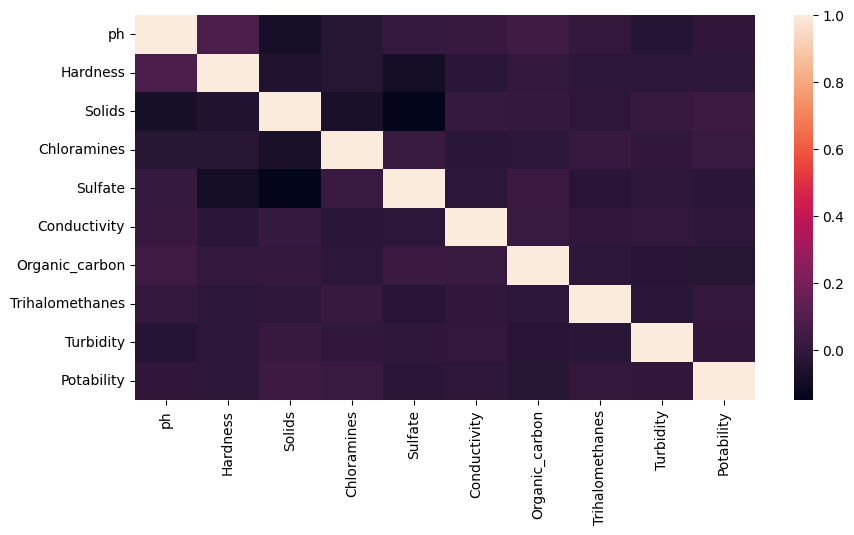

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr())

In [ ]:
#Detarminamos y grafico cantidad de datos para agua potable y no potable
df.Potability.unique()


array([0, 1])

In [ ]:
df.Potability.value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

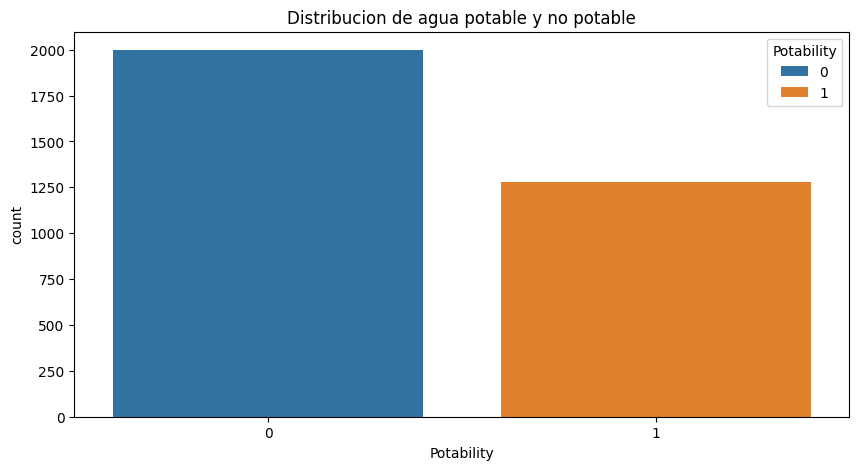

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Potability', hue = 'Potability')
plt.title('Distribucion de agua potable y no potable')
plt.show()

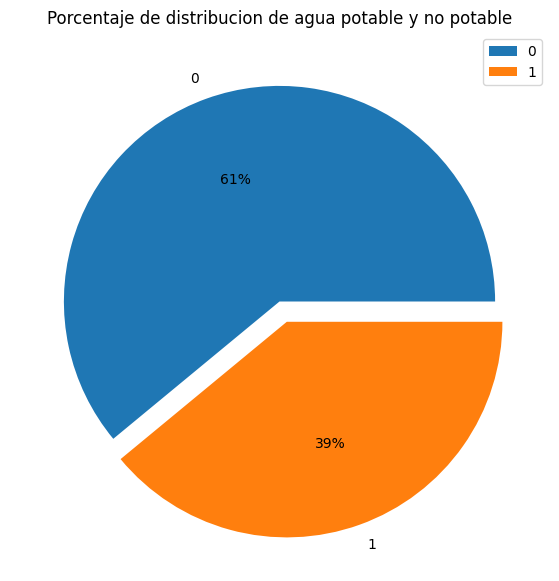

In [ ]:
#Porcentaje de datos para agua potable y no potable
fig,ax = plt.subplots(figsize =(8,7))
plt.pie(df['Potability'].value_counts(), labels=[0, 1], explode=[0, 0.1], autopct='%.f%%')
plt.legend()
ax.set_title('Porcentaje de distribucion de agua potable y no potable')
plt.show()

In [ ]:
#Analisis y grafica de valores atipicos(outliers) y de confianza
columns_name = df.columns
for index, col_name in enumerate(columns_name):
    print(index, col_name)

0 ph
1 Hardness
2 Solids
3 Chloramines
4 Sulfate
5 Conductivity
6 Organic_carbon
7 Trihalomethanes
8 Turbidity
9 Potability


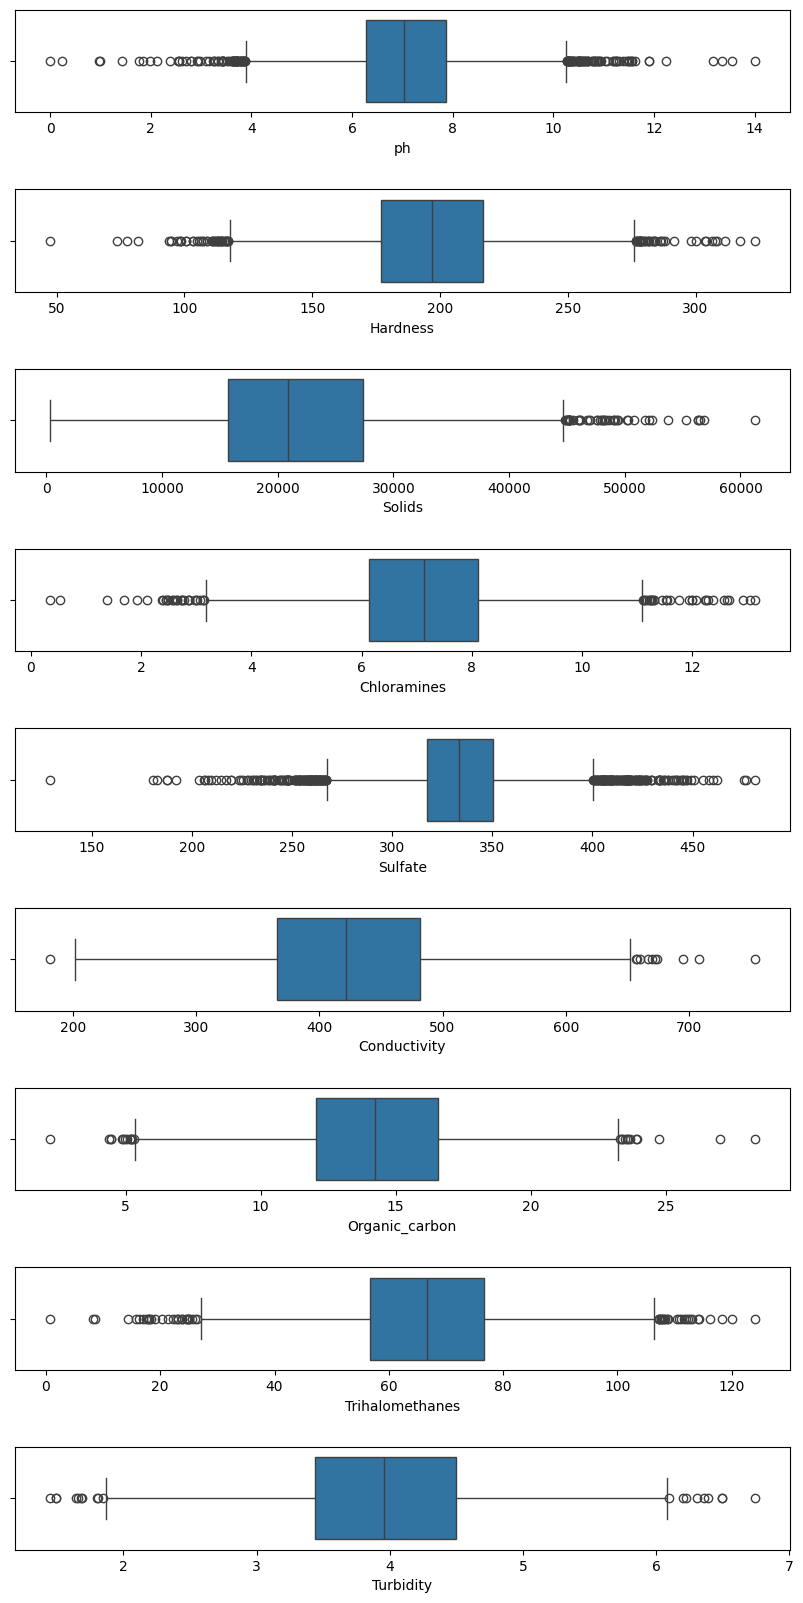

In [ ]:
fig, ax = plt.subplots(9, 1, figsize=(10, 20))
fig.subplots_adjust(hspace=0.75)
for i in range(9) :
    # Ax
    sns.boxplot(x=columns_name[i], data=df, ax=ax[i])

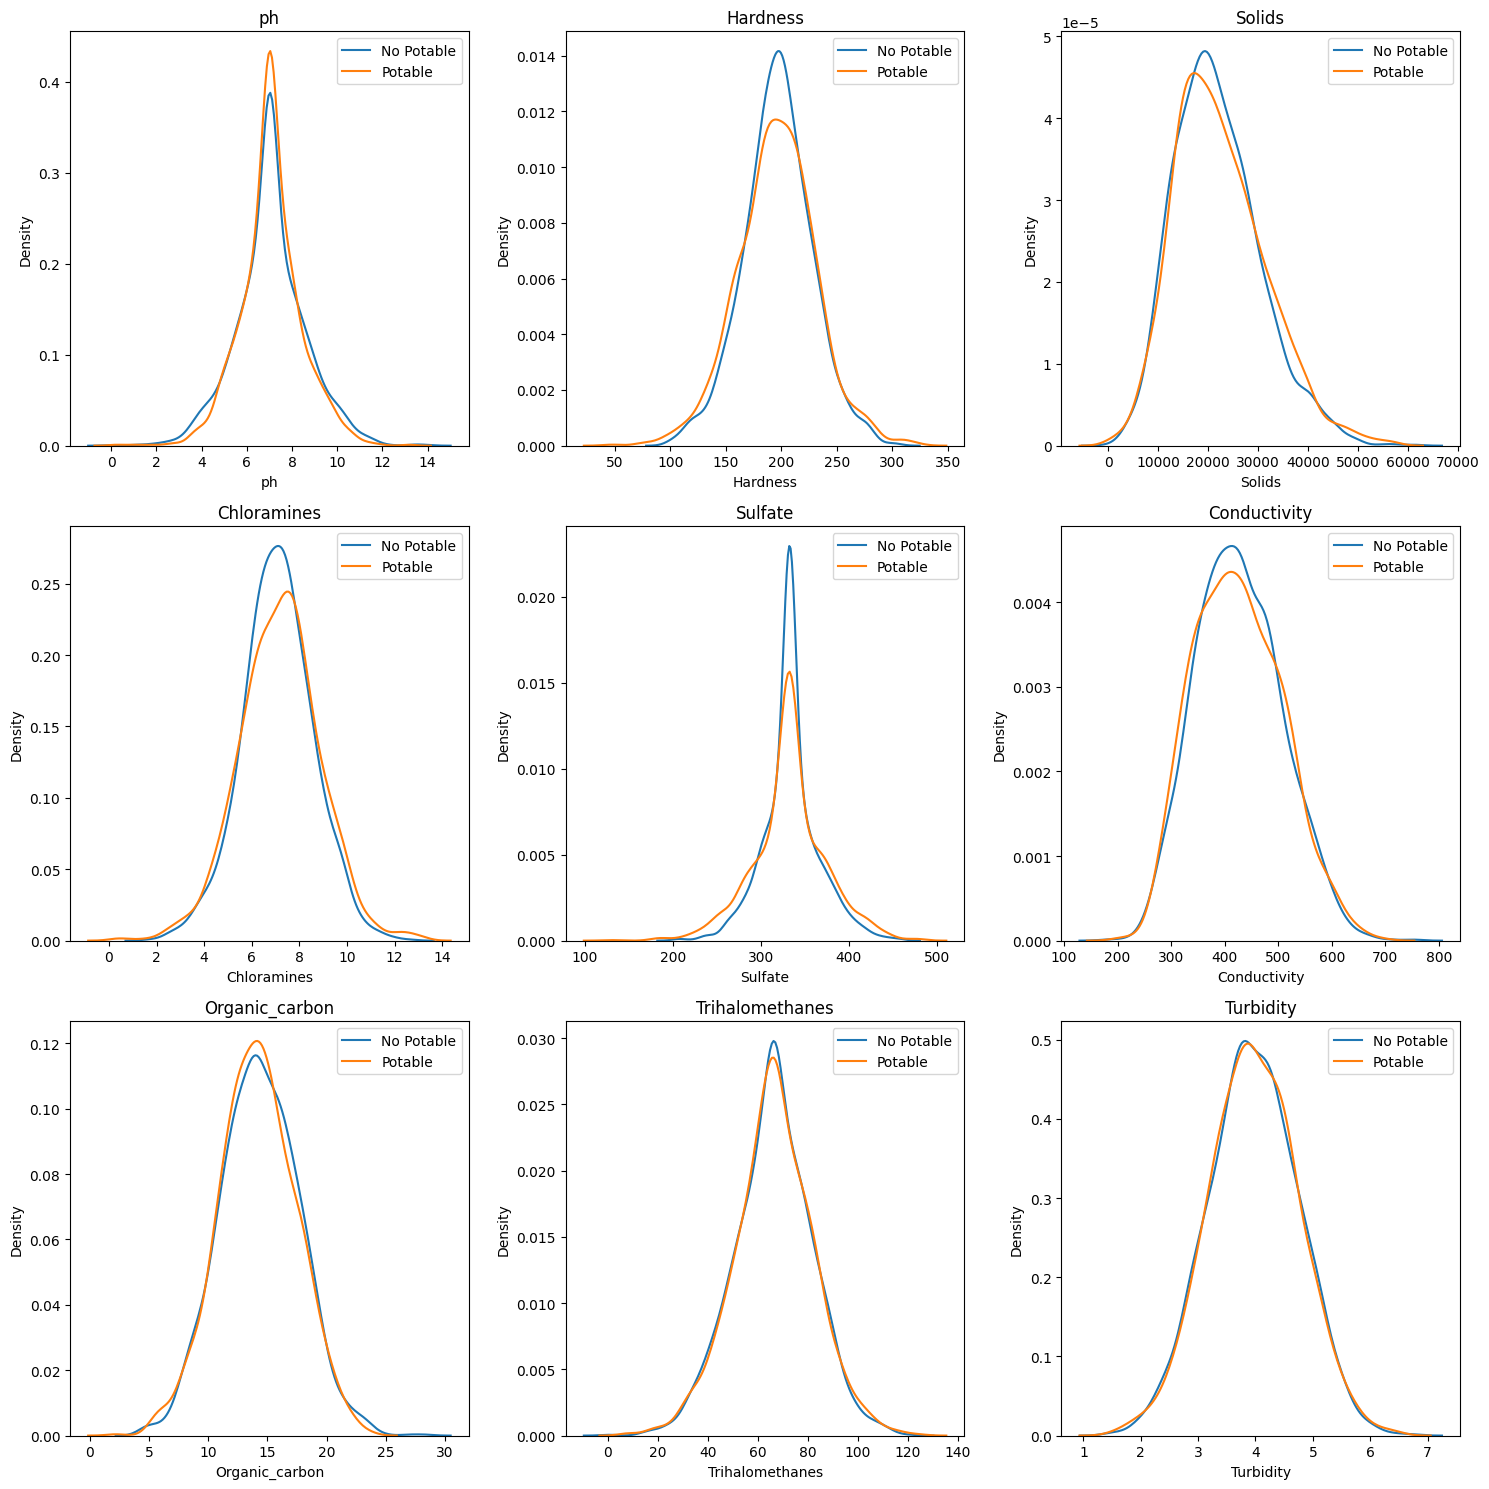

In [ ]:
#Distribucion de cada variable para agua potable y no potable
no_potable = df.query('Potability == 0')
potable = df.query('Potability == 1')
plt.figure(figsize=(15, 15))
for ax, col in enumerate(df.columns[:9]):
    plt.subplot(3, 3, ax+1)
    plt.title(col)
    sns.kdeplot(no_potable[col], label='No Potable')
    sns.kdeplot(potable[col], label='Potable')
    plt.legend()
plt.tight_layout()
